# PROJECT: Data Science London Bike Sharing Dataset

## UPLOAD LIBRARIES AND .CSV FILE

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next line loads a CSV file called 'London_merged.csv' into a DataFrame called 'df'. Sets the 'id' column as the index and treats '#N/A' as a NaN value in the DataFrame. This code is useful when you need to work with employee data and want to perform analysis using Pandas in Python.

In [7]:
df = pd.read_csv('../../data/London_merged.csv')
df.head(8)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0


### MetaData info
"timestamp" - timestamp field for grouping the data

"cnt" - the count of a new bike shares

"t1" - real temperature in C

"t2" - temperature in C "feels like"

"hum" - humidity in percentage

"wind_speed" - wind speed in km/h

"weather_code" - category of the weather

"is_holiday" - boolean field - 1 holiday / 0 non holiday

"is_weekend" - boolean field - 1 if the day is weekend

"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In order to know wich dtype of variables we are going to work we can use the command '.info()'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


We can see that there is no 'NaN' values in our DataSet

In [15]:
df['season'].value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In the column 'season' we have the 4 seasons in

In [18]:
df['weather_code'].value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [19]:
df['t1'].value_counts()

t1
 13.000000    969
 12.000000    822
 9.000000     807
 14.000000    802
 11.000000    779
             ... 
 31.500000      3
 31.000000      3
 34.000000      2
-1.500000       1
 10.333333      1
Name: count, Length: 73, dtype: int64

In [20]:
df['t2'].value_counts()

t2
 13.000000    969
 12.000000    821
 14.000000    802
 11.000000    774
 16.000000    729
             ... 
 33.000000      2
-5.500000       1
-5.000000       1
-6.000000       1
 10.333333      1
Name: count, Length: 82, dtype: int64

Its visible that 't1' and 't2, have really differents values in all DataSet so we dont work with that columns yet. In turn, it is observed that in the columns 'is_holiday' and 'is_weekend' we only have two possible values 0.0 when the condition is not and 1.0 when the condition is met.

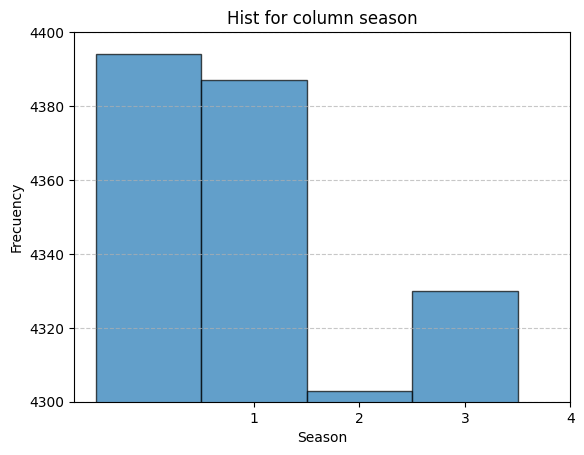

In [32]:
# Hist for column 'season'
plt.hist(df['season'], bins=range(0, 5), align='left', edgecolor='black', alpha=0.7)
plt.xlabel('Season')
plt.ylabel('Frecuency')
plt.title('Hist for column season')
plt.xticks(range(1, 5))  # adjust the x range of the plot
plt.ylim(bottom = 4300, top = 4400)  # adjust the y limit of the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show the hist
plt.show()

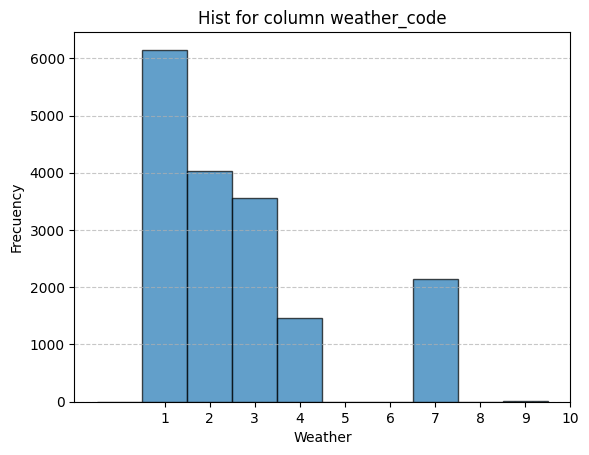

In [33]:
# Hist for column 'season'
plt.hist(df['weather_code'], bins=range(0, 11), align='left', edgecolor='black', alpha=0.7)
plt.xlabel('Weather')
plt.ylabel('Frecuency')
plt.title('Hist for column weather_code')
plt.xticks(range(1, 11))  # adjust the x range of the plot
#plt.ylim(bottom = 4300, top = 4400)  # adjust the y limit of the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show the hist
plt.show()

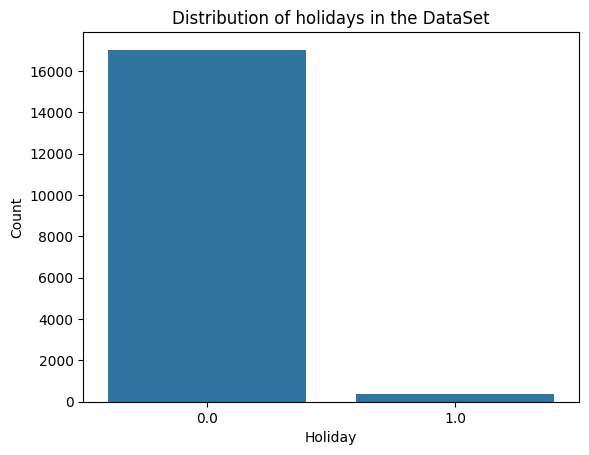

In [39]:
sns.countplot(x='is_holiday', data=df)

plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Distribution of holidays in the DataSet')

# show the graph
plt.show()

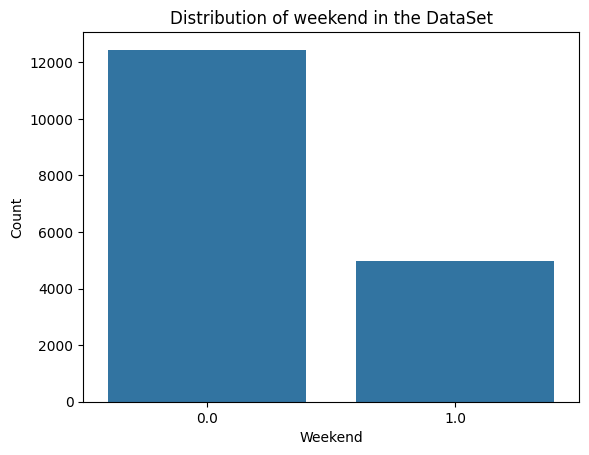

In [40]:
sns.countplot(x='is_weekend', data=df)

plt.xlabel('Weekend')
plt.ylabel('Count')
plt.title('Distribution of weekend in the DataSet')

# show the graph
plt.show()

In order to see wich week day is more useful the bike we change the value in column 'date' using the command '.to_datetime()'

In [47]:
df['date'] = pd.to_datetime(df['timestamp'])

In [52]:
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,day,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04 00:00:00,Sunday,January
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04 01:00:00,Sunday,January
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04 02:00:00,Sunday,January


In [57]:
weekly_bike_share  = (df.groupby('day')['cnt'].sum()/1000000).round(1)
weekly_bike_share

day
Friday       2.9
Monday       2.8
Saturday     2.5
Sunday       2.4
Thursday     3.1
Tuesday      3.1
Wednesday    3.1
Name: cnt, dtype: float64

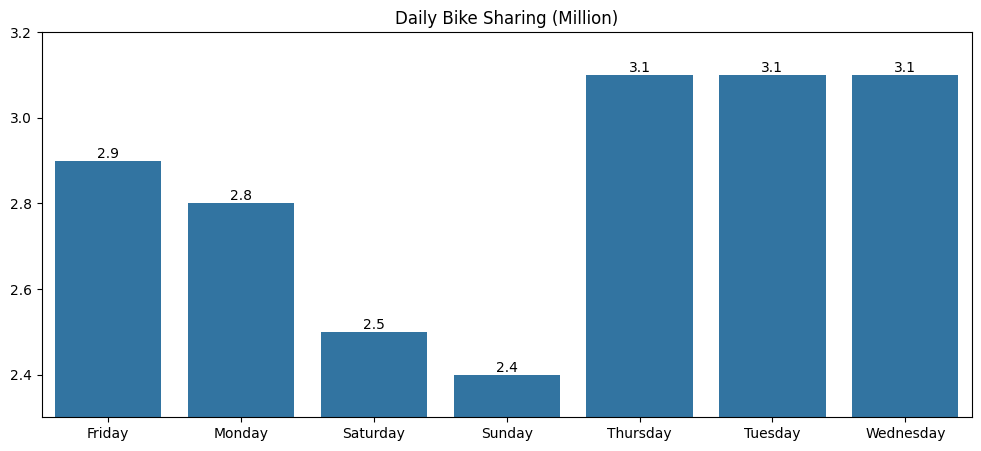

In [59]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=weekly_bike_share.index, y=weekly_bike_share.values, errorbar=None)
ax.set_title("Daily Bike Sharing (Million)")
ax.set_ylim(ymax=3.2,ymin=2.3)
ax.set_xlabel('') # To cancel writing "day" on the x-axis 

for i in ax.containers:
    ax.bar_label(i)

In [80]:
monthly_bike_share  = (df.groupby('month')['cnt'].sum()/1000000).round(1)
monthly_bike_share

month
April        1.6
August       2.2
December     1.3
February     1.1
January      1.2
July         2.3
June         2.0
March        1.4
May          1.9
November     1.4
October      1.8
September    1.9
Name: cnt, dtype: float64

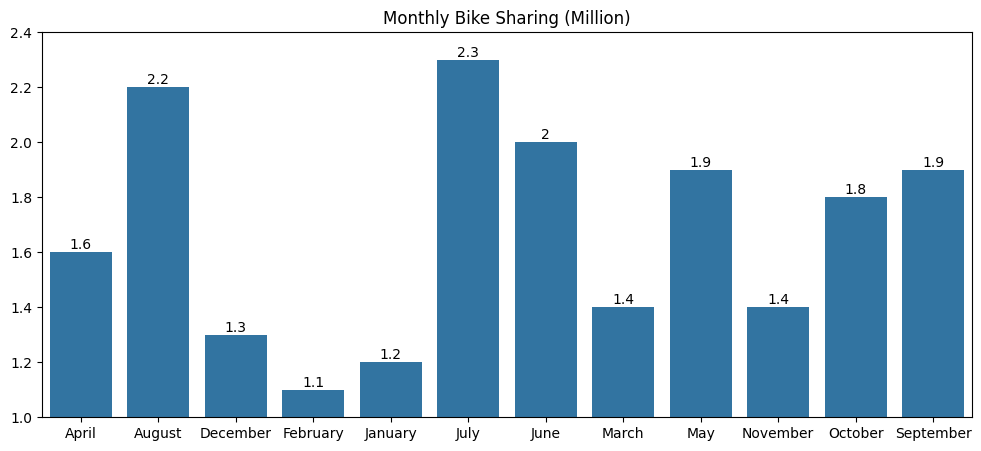

In [81]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values, errorbar=None)
ax.set_title("Monthly Bike Sharing (Million)")
ax.set_ylim(ymax=2.4,ymin=1.0)
ax.set_xlabel('') # To cancel writing "day" on the x-axis 

for i in ax.containers:
    ax.bar_label(i)

In [82]:
weather_bike_share  = (df.groupby('weather_code')['cnt'].sum()/1000000).round(1)
weather_bike_share

weather_code
1.0     7.1
2.0     6.0
3.0     4.2
4.0     0.9
7.0     1.5
10.0    0.0
26.0    0.0
Name: cnt, dtype: float64

C:\Users\egarn\AppData\Local\Temp\ipykernel_35492\442264283.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


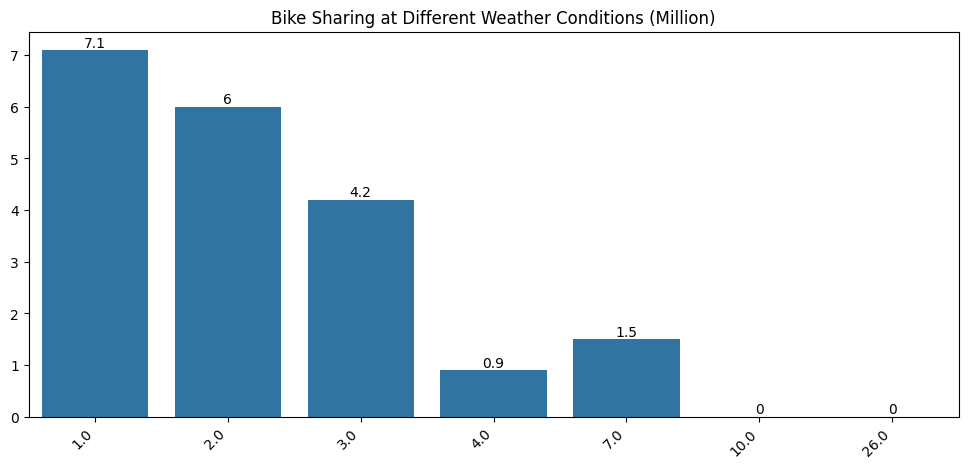

In [83]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=weather_bike_share.index, y=weather_bike_share.values, errorbar=None)
ax.set_title("Bike Sharing at Different Weather Conditions (Million)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('') # To cancel writing "weather" on the x-axis 

for i in ax.containers:
    ax.bar_label(i)

C:\Users\egarn\AppData\Local\Temp\ipykernel_35492\2259658667.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=45, ha='right')


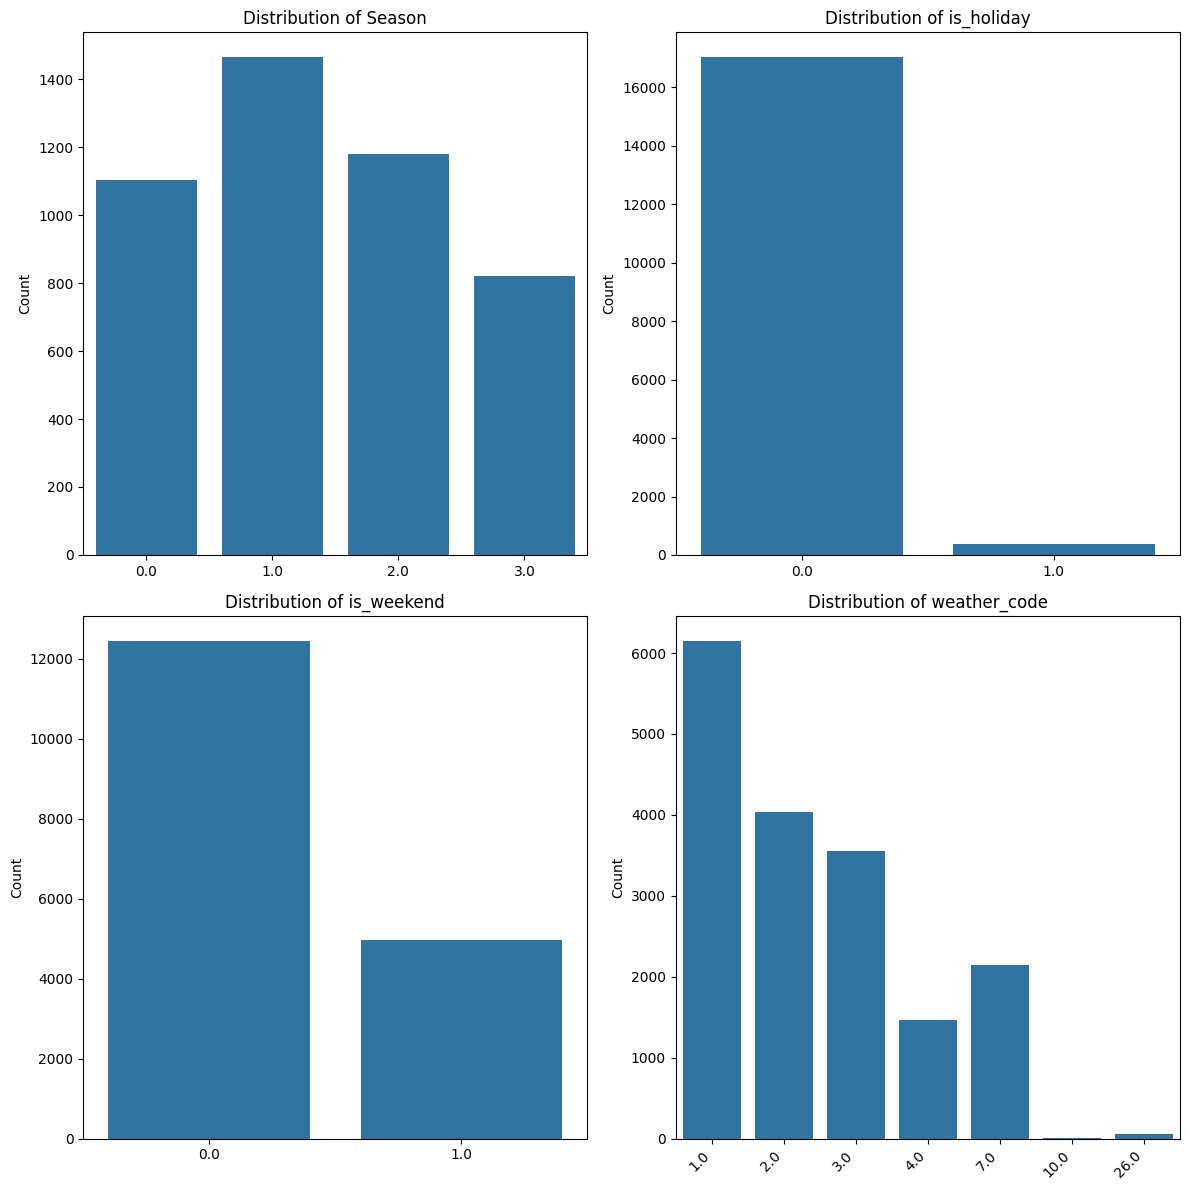

In [85]:
# 2. Way:

fig, ax = plt.subplots(2,2, figsize=(12, 12))


#ax=sns.barplot(data=df, x="season", y="cnt", errorbar=None)

# first plot by season
sns.barplot(data=df, x="season", y="cnt", ax = ax[0][0], errorbar=None)
ax[0][0].set_xlabel("Season")
ax[0][0].set_ylabel('Count')
ax[0][0].set_title('Distribution of Season')
ax[0][0].set_xlabel('')

# second plot by holiday
sns.countplot(data=df, x="is_holiday", ax=ax[0][1])
ax[0][1].set_xlabel("is_holiday")
ax[0][1].set_ylabel('Count')
ax[0][1].set_title('Distribution of is_holiday')
ax[0][1].set_xlabel('')

# third plot by weekend
sns.countplot(data=df, x="is_weekend", ax=ax[1][0])
ax[1][0].set_xlabel("is_weekend")
ax[1][0].set_ylabel('Count')
ax[1][0].set_title('Distribution of is_weekend')
ax[1][0].set_xlabel('')

# fourth plot by weather code
sns.countplot(data=df, x="weather_code", ax=ax[1][1])
ax[1][1].set_xlabel("weather_code")
ax[1][1].set_ylabel('Count')
ax[1][1].set_title('Distribution of weather_code')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=45, ha='right')
ax[1][1].set_xlabel('')

fig.tight_layout()
plt.show()